# <font color= #79b0e9> **Examen Parcial 3** </font> 

Sofía Maldonado García

Viviana Toledo De la Fuente

Iván Morales

In [46]:
# Librerías Generales
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Modelado
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Tratamiento de Datos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

---

# <font color= #79b0e9> **Análisis Exploratorio de Datos** </font> 

In [47]:
df = pd.read_csv('data/train_data.csv')
print(f' Tamaño del dataset: {df.shape}')
df.head()

 Tamaño del dataset: (119, 10)


,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,Male,272,68,188,82,124,Non-smoker,No,High
1,29,Female,275,68,183,84,129,Non-smoker,No,High
2,50,Male,268,55,189,111,119,Non-smoker,No,High
3,78,Female,194,50,120,94,113,Non-smoker,No,High
4,63,Male,229,35,182,214,160,Smoker,Yes,High


Contamos con un dataset de 119 observaciones, 9 features y 1 target. 

El dataset contiene información relacionada con pacientes y la predisposición que tienen de sufrir un padecimiento en específico, basado en las características biométricas y comorbilidades de cada une.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       119 non-null    int64 
 1   Sex       119 non-null    object
 2   TCh       119 non-null    int64 
 3   HCh       119 non-null    int64 
 4   LCh       119 non-null    int64 
 5   Tr        119 non-null    int64 
 6   BPS       119 non-null    int64 
 7   Sm        119 non-null    object
 8   Diabetes  119 non-null    object
 9   Pred      119 non-null    object
dtypes: int64(6), object(4)
memory usage: 9.4+ KB


Tenemos 6 features numéricas y 3 features categóricas (sex, smoking y diabetes). Tendremos que codificar estas variables para tomarlas en cuenta en nuestro modelo.

Además, no contamos con valores nulos.

## <font color= #4783bf> Variables Cualitativas </font>

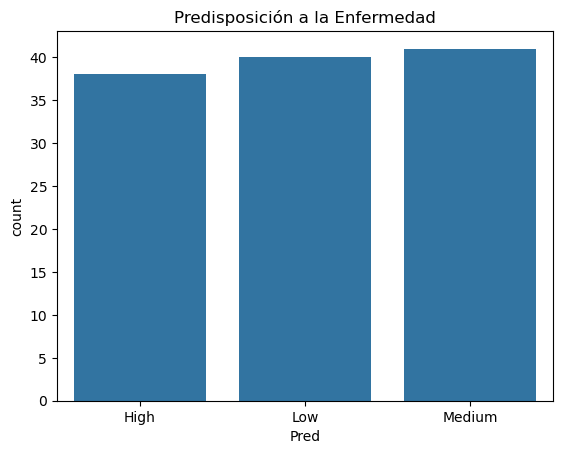

In [49]:
sns.countplot(x='Pred', data=df)
plt.title('Predisposición a la Enfermedad')
plt.show()

Nuestras clases no presentan un desbalanceo severo, lo que es deseable para predecir los tres niveles.

{'Male': 60, 'Female': 59}


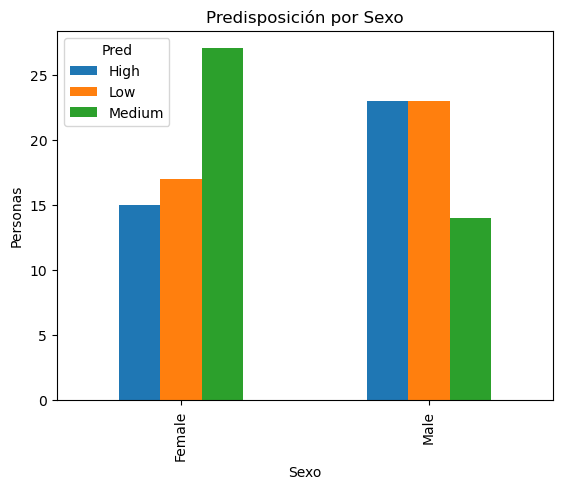

In [50]:
# Función para graficar variables cualitativas
def grafica_cualitativa(var, var_name):
    pd.crosstab(var, df.Pred).plot(kind='bar')
    # Estética
    plt.title(f'Predisposición por {var_name}')
    plt.xlabel(f'{var_name}')
    plt.ylabel('Personas')
    print(var.value_counts().to_dict())

grafica_cualitativa(df.Sex, 'Sexo')

Las categorías de Hombre y Mujer también están balanceadas. Además, observamos que en base a la muestra, las mujeres en su mayoría tienen una predisposición media a la enfermedad, mientras que los hombres están un poco más polarizados, pues tienen la misma probabilidad de tener una predisposición baja o alta.

{'No': 112, 'Yes': 7}


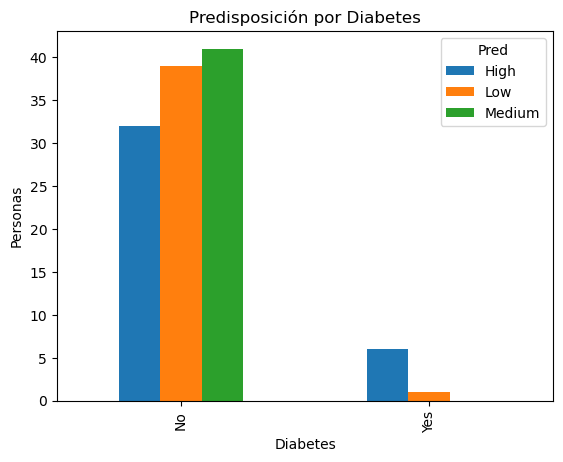

In [51]:
grafica_cualitativa(df.Diabetes, 'Diabetes')

No tener diabetes no parece tener mucho efecto en la predisposición a desarrollar el padecimiento. Sin embargo, es muy probable que personas con diabetes padezcan la enfermedad.

{'Non-smoker': 106, 'Smoker': 13}


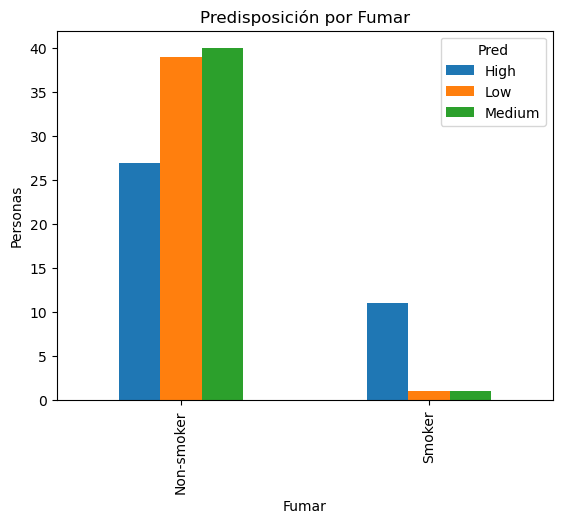

In [52]:
grafica_cualitativa(df.Sm, 'Fumar')

De nuevo, las personas que no fuman tienen prediposiciones mixtas de padecer la enfermedad. Pero es MUY probable que les fumadores desarrollen el padecimiento.

## <font color= #4783bf> Variables Cuantitativas </font>

In [53]:
df.describe()

,Age,TCh,HCh,LCh,Tr,BPS
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,53.369748,224.546218,57.739496,147.260504,132.126050,129.823529
std,16.096039,37.481464,11.393919,39.228462,60.799553,14.550116
min,25.000000,160.000000,31.000000,67.000000,80.000000,111.000000
25%,41.000000,188.000000,50.500000,115.000000,83.500000,119.000000
50%,55.000000,227.000000,62.000000,150.000000,111.000000,127.000000
75%,68.500000,259.500000,68.000000,181.000000,159.000000,138.000000
max,79.000000,277.000000,69.000000,220.000000,298.000000,168.000000


Las variables numéricas tienen escalas algo diferentes, si bien no tan excesivas. 

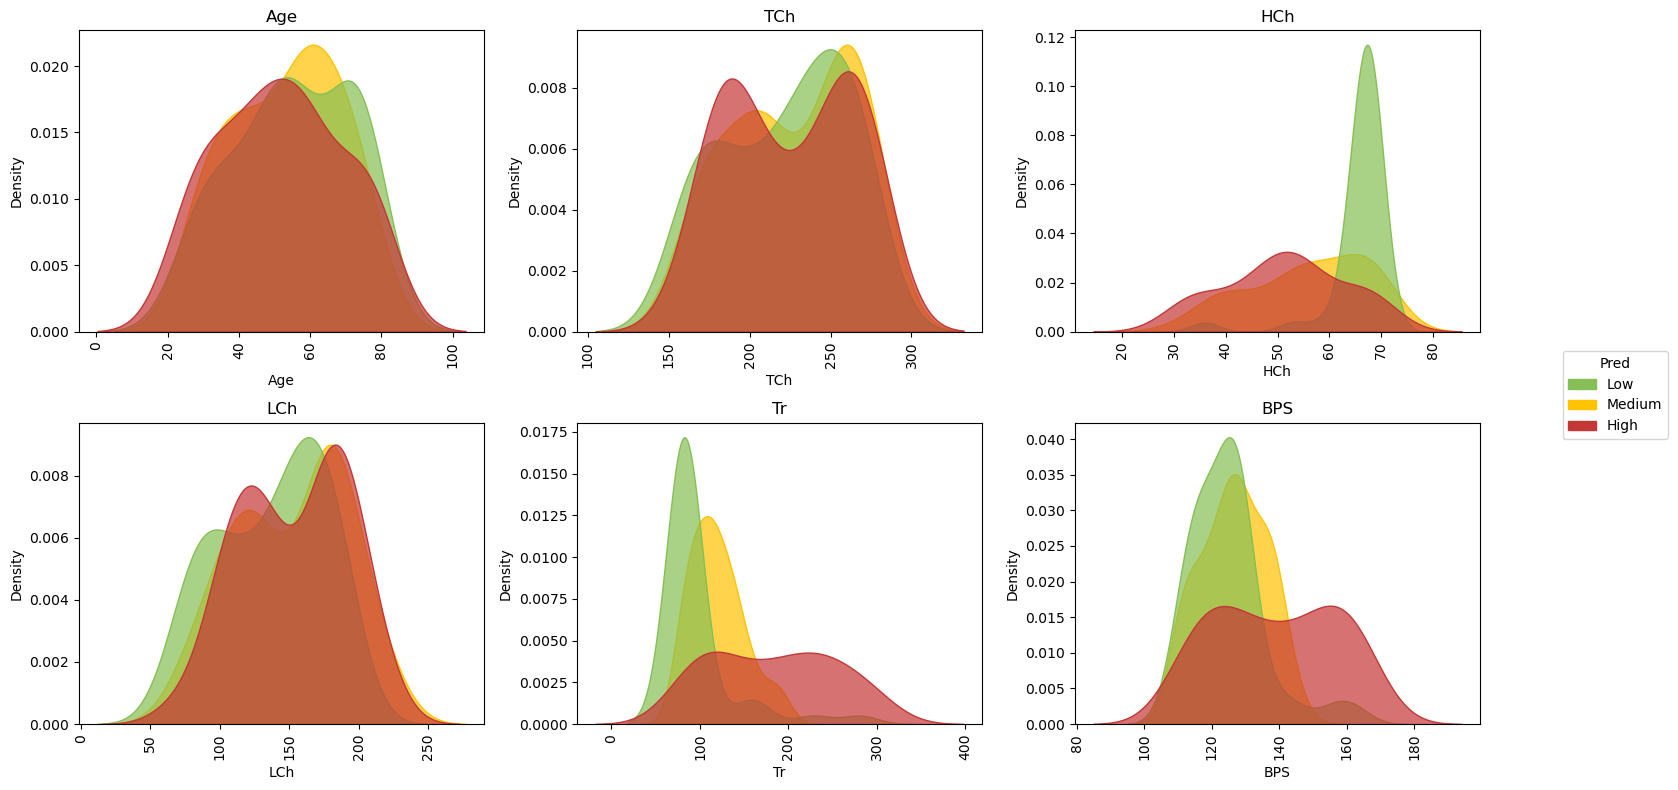

In [54]:
# Filtrar variables numéricas
numeric_vars = df.select_dtypes(include='number').columns.tolist()

# Crear grid 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Paleta de colores
palette = {'Low': '#86bf55', 'Medium': '#ffc300', 'High': '#c53636'}

# Gráficos
for i, var in enumerate(numeric_vars):
    ax = axes[i]
    sns.kdeplot(data=df, x=var, hue='Pred', fill=True, common_norm=False, alpha=0.7, ax=ax, palette=palette)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=90)
    ax.get_legend().remove()

# Leyenda
legend_patches = [Patch(color=color, label=label) for label, color in palette.items()]
fig.legend(handles=legend_patches, title='Pred', loc='center right', bbox_to_anchor=(1.12, 0.5))

plt.tight_layout()
plt.show()

Haciendo gráficas KDE para todas las variables numéricas con respecto a nuestras clases, podemos observar que la Edad, TCh y LCh no son variables con mucho poder predictivo. Sin embargo, las demás variables sí nos aportan discriminantes significativos para las clases.

- TCh: Si cuentan con altos valores de esta variable, es probable que las personas tengan una baja predisposición a la enfermedad.

- Tr: Los valores bajos de esta variable indican una probabilidad media-baja de padecer la enfermedad.

- BPS: A partir de los 100-130 existe una probabilidad baja o media de contraer la enfermedad. Conforme aumenta este nivel, baja la probabilidad de no ser afectade.

<Axes: >

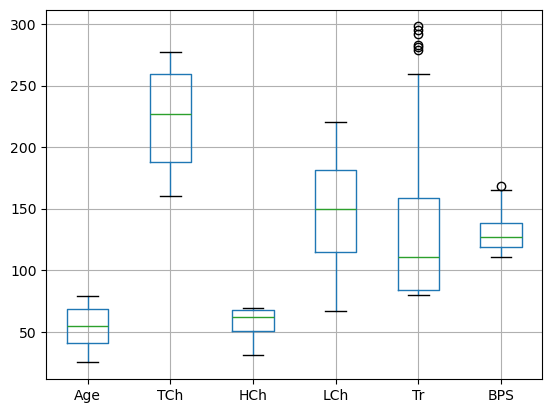

In [55]:
df.select_dtypes(include='number').boxplot()

La variable Tr presenta bastantes outliers, los cuales pueden ser algo problemáticos.

In [56]:
numeric = df.select_dtypes(include='number')

# Calculo de la asimetria con pandas
skewness = round(numeric.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Symmetric distribution'
    else: return 'Moderately skewed'
    
skewness['skewness'] = skewness.apply(f, axis=1)

skewness

,value,skewness
Age,-0.12,Symmetric distribution
TCh,-0.19,Symmetric distribution
HCh,-0.82,Moderately skewed
LCh,-0.21,Symmetric distribution
Tr,1.23,Highly Skewed
BPS,0.87,Moderately skewed


Debido a la presencia de outliers en Tr, aquella distribución está muy sesgada a la derecha. BPS y HCh están moderadamente sesgadas, a la derecha e izquierda, respectivamente. Lo anterior sugiere que, según el modelo, una transformación de datos no vendría mal. 

## <font color= #4783bf> Codificación de Variables </font>

Nuestras variables categóricas (Sexo, Diabetes y Fumadores) son variables binarias. Por lo tanto, basta con asignar 0's y 1's para codificar. 

In [57]:
df['Sex'] = df['Sex'].map({'Female': 0.0, 'Male': 1.0})
df['Diabetes'] = df['Diabetes'].map({'No': 0.0, 'Yes': 1.0})
df['Sm'] = df['Sm'].map({'Non-smoker': 0.0, 'Smoker': 1.0})
df.head()

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,1.0,272,68,188,82,124,0.0,0.0,High
1,29,0.0,275,68,183,84,129,0.0,0.0,High
2,50,1.0,268,55,189,111,119,0.0,0.0,High
3,78,0.0,194,50,120,94,113,0.0,0.0,High
4,63,1.0,229,35,182,214,160,1.0,1.0,High


# <font color= #79b0e9> **1. Logistic Regression** </font> 

In [58]:
df = pd.read_csv('data/train_data.csv')
print(f' Tamaño del dataset: {df.shape}')
df

 Tamaño del dataset: (119, 10)


,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,Male,272,68,188,82,124,Non-smoker,No,High
1,29,Female,275,68,183,84,129,Non-smoker,No,High
2,50,Male,268,55,189,111,119,Non-smoker,No,High
3,78,Female,194,50,120,94,113,Non-smoker,No,High
4,63,Male,229,35,182,214,160,Smoker,Yes,High
...,...,...,...,...,...,...,...,...,...,...
114,74,Female,274,55,192,141,141,Non-smoker,No,Medium
115,72,Female,248,69,163,183,122,Non-smoker,No,Medium
116,35,Male,213,67,121,106,129,Non-smoker,No,Medium
117,57,Female,197,42,131,188,133,Non-smoker,No,Medium


In [59]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True, dtype=float)
df['Diabetes'] = pd.get_dummies(df['Diabetes'], drop_first=True, dtype=float)
df['Sm'] = pd.get_dummies(df['Sm'], drop_first=True, dtype=float)
df
label_map = {0: 'Low', 1: 'Medium', 2:'High'}

In [60]:
x = df.drop(columns='Pred')
y = df['Pred']

X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=42, test_size=0.2, stratify=y)

#### <font color= #9F9FED> **Modelo Log Reg, V1 (Estandarización)** </font> 

Este primer modelo va a ser el más sencillo, con el único tratamiento a los datos siendo una estandarización con `StandardScaler` (aparte de la codificación necesaria para trabajar con el modelo).

In [61]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [62]:
logregv1 = LogisticRegression()
logregv1.fit(X_train_scaled, Y_train)

LogisticRegression()

In [63]:
y_pred_v1 = logregv1.predict(X_test_scaled)

In [64]:
# Parámetros
logregv1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

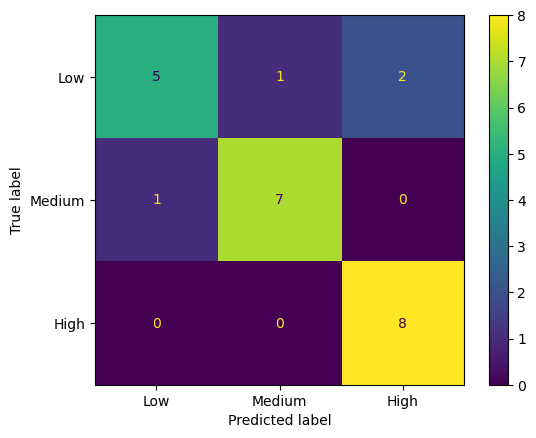

In [65]:
cmv1 = confusion_matrix(Y_test, y_pred_v1)
cmv1_display = ConfusionMatrixDisplay(cmv1, display_labels=['Low', 'Medium', 'High'])
cmv1_display.plot()
plt.show()

In [66]:
#Resultados - V1
print(f"Accuracy: {accuracy_score(Y_test, y_pred_v1)}")
print(f"Precision: {precision_score(Y_test, y_pred_v1, average='weighted')}")
print(f"Recall: {recall_score(Y_test, y_pred_v1, average='weighted')}")
print(f"F1-Score: {f1_score(Y_test, y_pred_v1, average='weighted')}")

Accuracy: 0.8333333333333334
Precision: 0.8361111111111112
Recall: 0.8333333333333334
F1-Score: 0.826058201058201


In [67]:
df_coef_v1 = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coef': logregv1.coef_[0]
})

df_coef_v1

,Feature,Coef
0,Age,-0.192074
1,Sex,0.443444
2,TCh,0.136345
3,HCh,-0.645783
4,LCh,0.052874
5,Tr,0.884278
6,BPS,0.231027
7,Sm,0.385426
8,Diabetes,0.236060


Con esta info, podemos ver que el modelo base es relativamente decente (5/6 para accuracy y Recall) pero claramente tiene espacio de mejora.

También podemos ver que las variables más relevantes (esto lo podemos ver con sus coefficients) son *Tr*, *Sex* y *HCh*

#### <font color= #9F9FED> **Modelo Log Reg, V2 (Estandarización + GridSearch)** </font> 

Para el segundo modelo, aparte de la estandarización previamente hecha, también vamos a utilizar un GridSearch para encontrar los mejores hiperparámetros posibles.

In [68]:
pipe_v2 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1','l2', 'elasticnet'],
    'logreg__solver': ['liblinear', 'saga'],
}

gridv2 = GridSearchCV(pipe_v2, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
gridv2.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\sofi\miniconda3\envs\EO\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sofi\miniconda3\envs\EO\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sofi\miniconda3\envs\EO\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sofi\miniconda3\envs\EO\Lib\site-packages\sklearn\pipeline.py", line 662, in 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet'],
                         'logreg__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [69]:
#Parámetros
print('Mejores Parámetros:', gridv2.best_params_)
print('Mejor Accuracy: ', gridv2.best_score_)

Mejores Parámetros: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
Mejor Accuracy:  0.6947368421052631


In [70]:
y_pred_v2 = gridv2.predict(X_test)

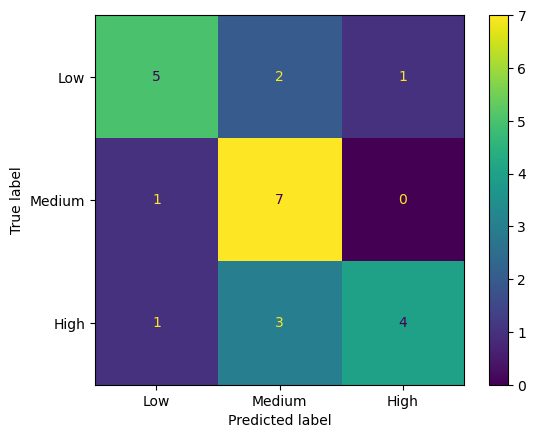

In [71]:
cmv2 = confusion_matrix(Y_test, y_pred_v2)
cmv1_display = ConfusionMatrixDisplay(cmv2, display_labels=['Low', 'Medium', 'High'])
cmv1_display.plot()
plt.show()

In [72]:
#Metriacas
print(f"Accuracy: {accuracy_score(Y_test, y_pred_v2)}")
print(f"Precision: {precision_score(Y_test, y_pred_v2, average='weighted')}")
print(f"Recall: {recall_score(Y_test, y_pred_v2, average='weighted')}")
print(f"F1-Score: {f1_score(Y_test, y_pred_v2, average='weighted')}")

Accuracy: 0.6666666666666666
Precision: 0.6992063492063493
Recall: 0.6666666666666666
F1-Score: 0.6606837606837607


In [73]:
pipe_v3 = Pipeline(steps=[
    ('feature_selection', VarianceThreshold()),
    ('normalizer', Normalizer()),
    ('dim_reduction', LDA())
])

X_train_logregv3 = pipe_v3.fit_transform(X_train, Y_train)
X_test_logregv3 = pipe_v3.transform(X_test)

In [74]:
logregv3 = LogisticRegression(C=0.1, solver='newton-cg', penalty='l2')
logregv3.fit(X_train_logregv3, Y_train)
y_pred_v3 = logregv3.predict(X_test_logregv3)

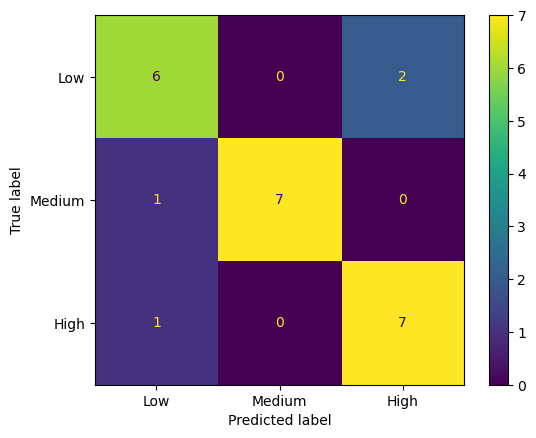

In [75]:
cmv3 = confusion_matrix(Y_test, y_pred_v3)
cmv3_display = ConfusionMatrixDisplay(cmv3, display_labels=['Low', 'Medium', 'High'])
cmv3_display.plot()
plt.show()

In [76]:
#Métricas Performace, V3
print(f"Exactitud (Accuracy): {accuracy_score(Y_test, y_pred_v3):.3f}")
print(f"Precisión (Presition): {precision_score(Y_test, y_pred_v3, average='weighted'):.3f}")
print(f"Recall: {recall_score(Y_test, y_pred_v3, average='weighted'):.3f}")
print(f"F1 Score: {f1_score(Y_test, y_pred_v3, average='weighted'):.3f}")

Exactitud (Accuracy): 0.833
Precisión (Presition): 0.843
Recall: 0.833
F1 Score: 0.836


#### <font color= #9F9FED> **LogReg - Visualización** </font> 


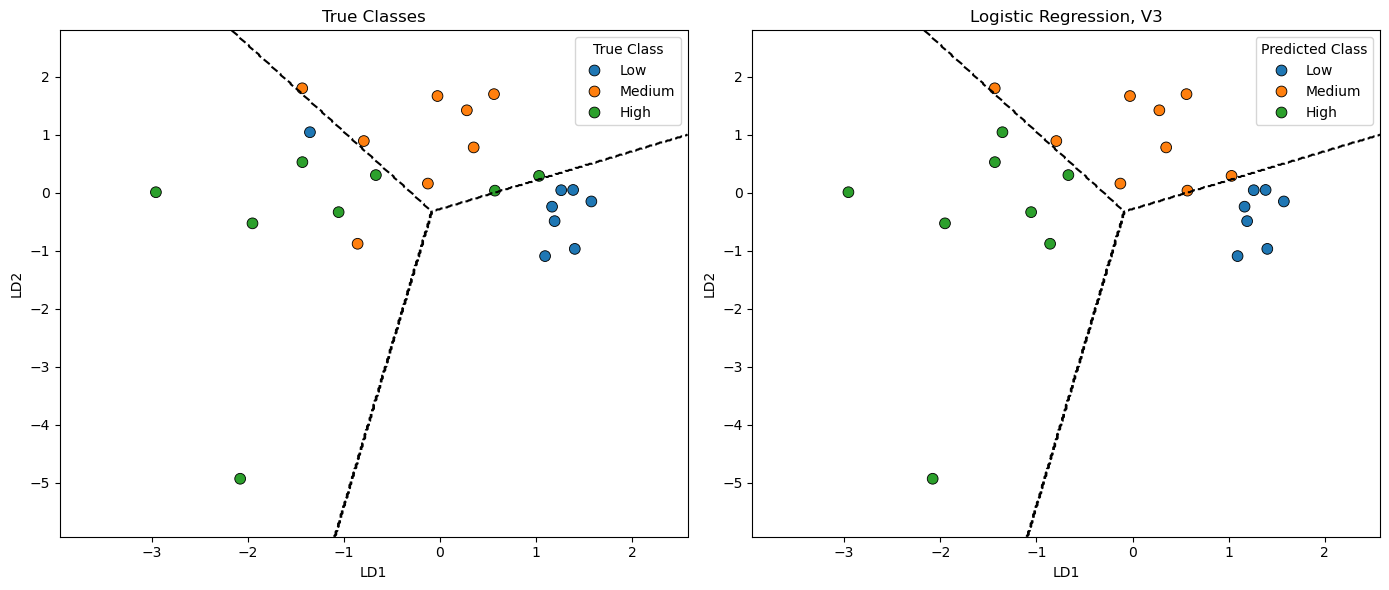

In [77]:
inverse_label_map = {v: k for k, v in label_map.items()}

# Grid for Decision Lines
x_min, x_max = X_test_logregv3[:, 0].min() - 1, X_test_logregv3[:, 0].max() + 1
y_min, y_max = X_test_logregv3[:, 1].min() - 1, X_test_logregv3[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z_labels = logregv3.predict(grid)
Z_numeric = np.vectorize(inverse_label_map.get)(Z_labels).reshape(xx.shape)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Real Data
X_truth_df = pd.DataFrame(X_test_logregv3, columns=['LD1', 'LD2'])
X_truth_df['True Class'] = Y_test.loc[X_test.index].reset_index(drop=True)

sns.scatterplot(data=X_truth_df, x='LD1', y='LD2', hue='True Class',
                ax=axes[0], s=60, edgecolor='k')
axes[0].set_title('True Classes')
axes[0].set_xlabel('LD1')
axes[0].set_ylabel('LD2')

# Predictions
X_pred_df = pd.DataFrame(X_test_logregv3, columns=['LD1', 'LD2'])
X_pred_df['Predicted Class'] = y_pred_v3

sns.scatterplot(data=X_pred_df, x='LD1', y='LD2', hue='Predicted Class',
                ax=axes[1], s=60, edgecolor='k')
axes[1].set_title('Logistic Regression, V3')
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')

# Drawing the Decision Lines
for ax in axes:
    ax.contour(xx, yy, Z_numeric, levels=[0.5, 1.5], colors='k', linestyles='--')

plt.tight_layout()
plt.show()

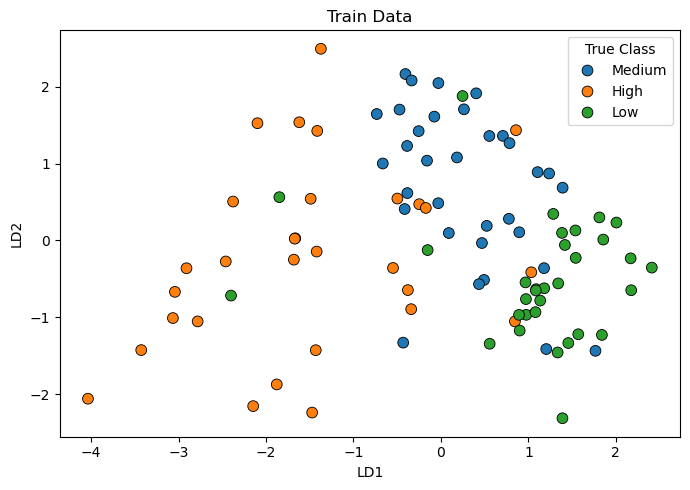

In [78]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot values
X_truth_df = pd.DataFrame(X_train_logregv3, columns=['LD1', 'LD2'])
X_truth_df['True Class'] = Y_train.loc[X_train.index].reset_index(drop=True)

sns.scatterplot(data=X_truth_df, x='LD1', y='LD2', hue='True Class', ax=axes, s=60, edgecolor='k')
axes.set_title('Train Data')
axes.set_xlabel('LD1')
axes.set_ylabel('LD2')

plt.tight_layout()
plt.show()

# <font color= #79b0e9> **2. Support Vector Classifier** </font> 

El Support Vector Classifier es un algoritmo robusto, que permite clasificar datos en base a un hiperplano que genera el mismo modelo. Funciona mejor con datos que no estén tan dispersos, lo que se puede manejar mediante una estandarización. Además, no se ve tan afectado por la alta dimensionalidad o presencia de atípicos. Por lo tanto, tenemos los siguientes planes de acción:

- Estandarización → SVC

- Estandarización → Variance Feature Selection / RFE → SVC

- Estandarización → Variance Feature Selection → Normalizer → LDA (como segunda técnica de feature selection y además reducción de dimensionalidad) → SVC

Evaluaremos la performance con cada uno de ellos.

In [79]:
X = df.drop(columns='Pred')
y = df['Pred']

Con finalidad de observar nuestros datos, realizaremos una reducción de dimensionalidad con LDA:

In [80]:
# Color Palette
custom_palette = {
    'High': '#f01d0f',                 # Red
    'Medium': '#f0bc4c',               # Yellow
    'Low': '#86bf55'                   # Green
}

# Dimensionality Reduction
lda = LDA()
X_lda = lda.fit_transform(X, y)

# Prepare DataFrame for Plotly
X_truth_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
X_truth_df['True Class'] = y.loc[X.index].reset_index(drop=True)
X_truth_df['Data ID'] = X.index  

# Plotly Scatter Plot
fig = px.scatter(
    X_truth_df, 
    x='LD1', 
    y='LD2', 
    color='True Class',
    title='LDA for All Data with Class Label',
    labels={'LD1': 'LD1', 'LD2': 'LD2'},
    color_discrete_map=custom_palette,
    hover_data=['Data ID', 'True Class']  # Include ID in hover
)

fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(width=700, height=500)
fig.show()

En base a la gráfica, podemos observar que tenemos algunos datos que producen ruido dentro de las clases. Puede ser debido a un mislabeling o a datos atípicos que se colaron dentro de cierta clase. Con el objetivo de que nuestro modelo pueda predecir de la mejor manera, se eliminarán estos datos atípicos antes de hacer el train-test-split.

In [81]:
drop_ID = [75, 76, 77, 3, 80, 74, 0, ]

X_clean = X.drop(drop_ID)
y_clean = y.drop(drop_ID)

In [82]:
# Codificar la y
label_map = {0: 'Low', 1: 'Medium', 2: 'High'}
y_test_named = y.map(label_map) 

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=12, stratify=y_clean)

## <font color= #4783bf> SVC con Estandarización </font>

In [83]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes
0,0.440293,-1.082004,0.737006,-0.368672,0.819527,-0.786762,-1.214183,-0.292174,-0.21693
1,1.620223,-1.082004,1.321669,-0.627032,1.682234,-0.717141,0.635468,-0.292174,-0.21693
2,1.433919,0.924211,1.405192,-0.196431,1.420807,-0.247196,2.271698,-0.292174,-0.21693
3,0.626598,-1.082004,0.904053,0.492530,0.584244,1.789234,2.413979,3.422614,-0.21693
4,0.067684,-1.082004,0.876212,-1.402113,1.028668,0.901560,1.702574,-0.292174,-0.21693


In [84]:
svm1 = SVC()

svm1.fit(X_train, y_train)
y_pred = svm1.predict(X_test)

Al evaluar el modelo SVC con kernel lineal y sus propios parámetros, así como al evaluarlo con kernel rbf y sus parámetros correspondientes, nos dimos cuenta de que (irónicamente) el mejor modelo es el default.

Además, nuestros datos no parecen ajustarse de manera satisfactoria al kernel lineal.

In [85]:
svm1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Este modelo tiene una kernel rbf, con C=1 y gamma 'scale', que equivale a $ \frac {1} {n_{features} * X.var()} $.

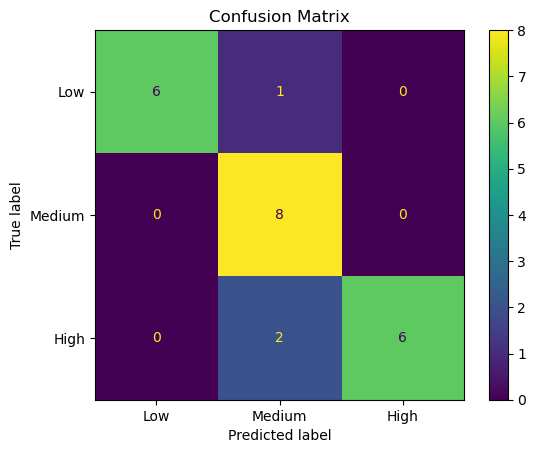

In [86]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Low', 'Medium', 'High'])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

La clase que mejor predice nuestro modelo es 'Medium', sin embargo, también es la clase donde más se confunde nuestro modelo.

In [87]:
# Métricas de Performance
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Exactitud (Accuracy): 0.8696
Precisión (Precision): 0.9051
Sensibilidad (Recall): 0.8696
F1-Score: 0.8720


La exactitud de nuestro modelo es de 0.86, lo cual no es nada malo, en parte por la eliminación de ruido en el dataset. Además, el F1-score es de 0.87, lo cual refuerza la evidencia de que el SVC con estandarización es una buena opción.

## <font color= #4783bf> SVC con Estandarización y Selección de Variables </font>

### <font color= #4783bf> &ensp; • Preprocesamiento </font>

Para la selección de variables, utilizaremos RFE. Sin embargo, el RFE necesita un coeficiente para poder optimizar las variables, mientras que estamos usando una kernel no lineal para nuestros datos. Por lo tanto, el RFE se optimizará en base al kernel lineal.

In [88]:
# Crear modelo
model = SVC(kernel='linear')

# RFE
rfe = RFE(model, verbose=0) 
rfe = rfe.fit(X_train_scaled, y_train.values.ravel())

# Seleccionamos las mejores variables
X_train_selected = X_train_scaled[rfe.get_feature_names_out()]
X_test_selected = X_test_scaled[rfe.get_feature_names_out()]

In [89]:
# Modelado
svm2 = SVC()

svm2.fit(X_train_selected, y_train)
y_pred = svm2.predict(X_test_selected)

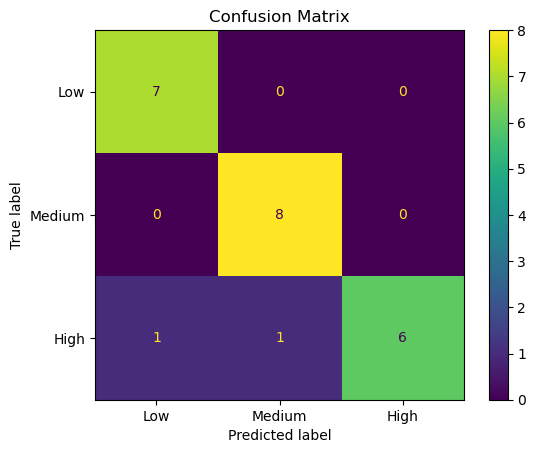

In [90]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Low', 'Medium', 'High'])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

Ahora, nuestro modelo predice de una manera excelente la clase Low y Medium, mientras que comete algunos errores en High.

In [91]:
# Métricas de Performance
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Exactitud (Accuracy): 0.9130
Precisión (Precision): 0.9233
Sensibilidad (Recall): 0.9130
F1-Score: 0.9096


Con la estandarización, feature selection con RFE y SVC con rbf kernel, nuestro modelo obtiene una precisión de 0.91, lo cual no es tan distante de la F1-score.

## <font color= #4783bf> SVC con Doble Selección de Variables y Normalización </font>

Ahora, procederemos a hacer una feature selection con la varianza, normalizar los datos, realizar una transformación LDA y finalmente realizar el modelo SVC:

In [92]:
preprocessor_svm3 = Pipeline(steps=[
    ('feature_selection', VarianceThreshold()),
    ('normalizer', Normalizer()),
    ('dim_reduction', LDA())
    ])

X_train_transformed = preprocessor_svm3.fit_transform(X_train, y_train)
X_test_transformed = preprocessor_svm3.transform(X_test)

In [93]:
# Le colocamos una penalización
svm3 = SVC(kernel='linear', C=0.5, 
           ) 

svm3.fit(X_train_transformed, y_train)
y_pred = svm3.predict(X_test_transformed)

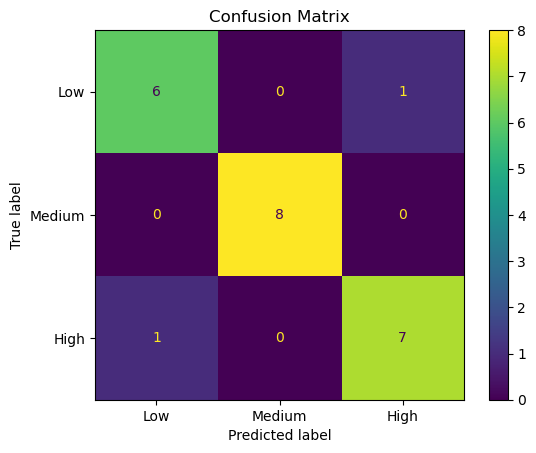

In [94]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Low', 'Medium', 'High'])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

Nuestro modelo obtiene resultados similares al modelo anterior, sin embargo, los errores ahora están distribuidos en la clase de Low y High. Continúa prediciendo de manera acertada Medium.

In [95]:
# Métricas de Performance
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"Precisión (Precision): {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Exactitud (Accuracy): 0.9130
Precisión (Precision): 0.9130
Sensibilidad (Recall): 0.9130
F1-Score: 0.9130


Debido a la distribución más uniforme de nuestros errores, el modelo obtiene una score universal de 0.913

## <font color= #4783bf> Visualización </font>

Para visualizar nuestros datos y el hiperplano generado, utilizaremos el último modelo. No solo porque el LDA facilita la visualización, sino también porque el LDA nos permite combinar los efectos de múltiples features. De esta manera, conseguimos un modelo de "2 variables", que combina los efectos de todas las variables. 

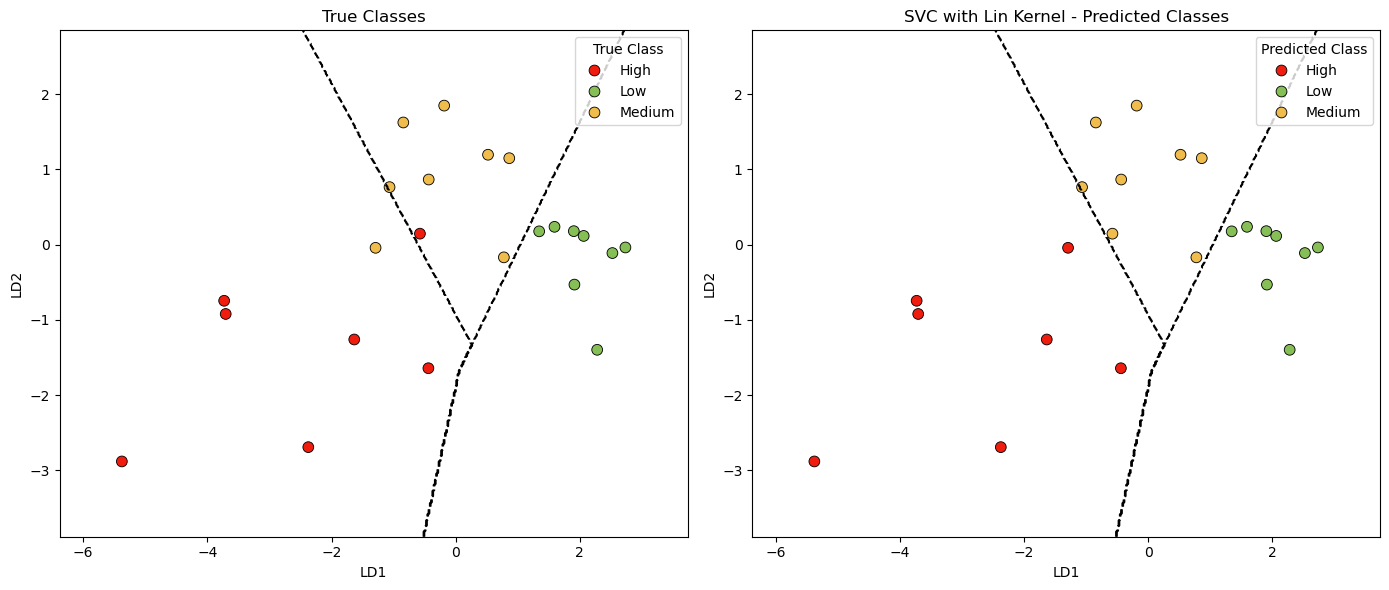

In [96]:
inverse_label_map = {v: k for k, v in label_map.items()}

# Grid for Decision Lines
x_min, x_max = X_test_transformed[:, 0].min() - 1, X_test_transformed[:, 0].max() + 1
y_min, y_max = X_test_transformed[:, 1].min() - 1, X_test_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z_labels = svm3.predict(grid)
Z_numeric = np.vectorize(inverse_label_map.get)(Z_labels).reshape(xx.shape)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Real Data
X_truth_df = pd.DataFrame(X_test_transformed, columns=['LD1', 'LD2'])
X_truth_df['True Class'] = y_test.loc[X_test.index].reset_index(drop=True)

sns.scatterplot(data=X_truth_df, x='LD1', y='LD2', hue='True Class',
                palette=custom_palette, ax=axes[0], s=60, edgecolor='k')
axes[0].set_title('True Classes')
axes[0].set_xlabel('LD1')
axes[0].set_ylabel('LD2')

# Predictions
X_pred_df = pd.DataFrame(X_test_transformed, columns=['LD1', 'LD2'])
X_pred_df['Predicted Class'] = y_pred

sns.scatterplot(data=X_pred_df, x='LD1', y='LD2', hue='Predicted Class',
                palette=custom_palette, ax=axes[1], s=60, edgecolor='k')
axes[1].set_title('SVC with Lin Kernel - Predicted Classes')
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')

# Drawing the Decision Lines
for ax in axes:
    ax.contour(xx, yy, Z_numeric, levels=[0.5, 1.5], colors='k', linestyles='--')

plt.tight_layout()
plt.show()

Como podemos ver, nuestro modelo divide claramente a las clases, y gracias al LDA, puede hacerlo con un kernel lineal. Debido a que tenemos un poco de ruido en las clases, los 2 errores que comete el SVC no parecen ser por una deficiencia del modelo, sino generada por el ruido.

En base a las gráficas, podemos observar que las transformaciones realizadas permiten que nuestro modelo diferencíe de buena manera nuestras clases. Además, nos facilita la visualización.

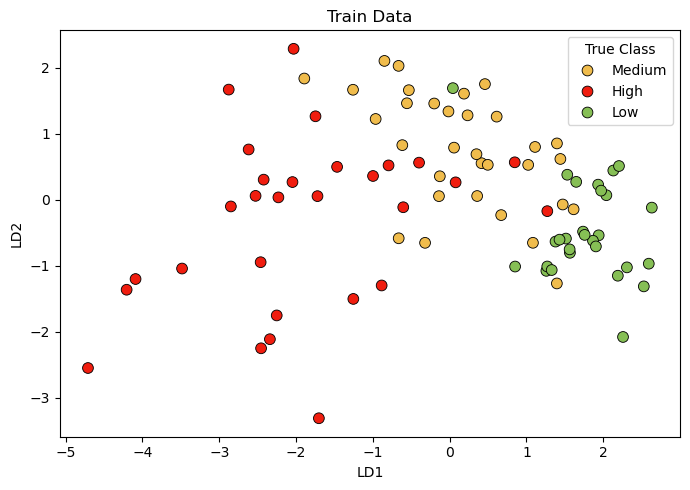

In [97]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot values
X_truth_df = pd.DataFrame(X_train_transformed, columns=['LD1', 'LD2'])
X_truth_df['True Class'] = y_train.loc[X_train.index].reset_index(drop=True)

sns.scatterplot(data=X_truth_df, x='LD1', y='LD2', hue='True Class', palette=custom_palette, ax=axes, s=60, edgecolor='k')
axes.set_title('Train Data')
axes.set_xlabel('LD1')
axes.set_ylabel('LD2')

plt.tight_layout()
plt.show()

Finalmente, para observar los datos con los que entrenó nuestro modelo, graficamos los componentes y las clases de nuestro Train Split. Como podemos ver, las clases están lo suficientemente separadas, pero observamos algo de ruido que puede afectar a nuestro modelo, incluso aunque se mitigó durante las primeras etapas del proyecto.

---

# <font color= #79b0e9> **New Test Data** </font> 

In [ ]:
#LogReg
def pred_new_data_logreg():
    # Ingresar los nuevos datos
    new_data = []

    print('Ingresa la información correspondiente al nuevo dato, separa los datos con comas:')
    print('Age | Sex | TCh | HCh | LCh | Tr | BPS | Sm | Diabetes')

    while True:
        dato = input("")  

        if dato == "":
            break

        new_data.append(dato.split(','))

    # Hacer el dataframe
    df = pd.DataFrame(new_data, columns=['Age', 'Sex', 'TCh', 'HCh', 'LCh', 'Tr', 'BPS', 'Sm', 'Diabetes'])

    # Codificar las variables
    df['Sex'] = df['Sex'].map({'Female': 0.0, 'Male': 1.0})
    df['Diabetes'] = df['Diabetes'].map({'No': 0.0, 'Yes': 1.0})
    df['Sm'] = df['Sm'].map({'Non-smoker': 0.0, 'Smoker': 1.0})

    # Transformar los datos
    test_transformed = pipe_v3.transform(df)
    predictions = logregv3.predict(test_transformed)
    
    # Predecir
    print("\nLas predicciones para los datos ingresados son:")
    for i, pred in enumerate(predictions):
        print(f"Para el dato {i+1}: {pred}")

pred_new_data_logreg()

Ingresa la información correspondiente al nuevo dato, separa los datos con comas:
Age | Sex | TCh | HCh | LCh | Tr | BPS | Sm | Diabetes


ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by VarianceThreshold.

In [ ]:
#SVC
def pred_new_data_svc():
    # Ingresar los nuevos datos
    new_data = []

    print('Ingresa la información correspondiente al nuevo dato, separa los datos con comas:')
    print('Age | Sex | TCh | HCh | LCh | Tr | BPS | Sm | Diabetes')

    while True:
        dato = input("")  

        if dato == "":
            break

        new_data.append(dato.split(','))

    # Hacer el dataframe
    df = pd.DataFrame(new_data, columns=['Age', 'Sex', 'TCh', 'HCh', 'LCh', 'Tr', 'BPS', 'Sm', 'Diabetes'])

    # Codificar las variables
    df['Sex'] = df['Sex'].map({'Female': 0.0, 'Male': 1.0})
    df['Diabetes'] = df['Diabetes'].map({'No': 0.0, 'Yes': 1.0})
    df['Sm'] = df['Sm'].map({'Non-smoker': 0.0, 'Smoker': 1.0})

    # Transformar los datos
    test_transformed = preprocessor_svm3.transform(df)
    predictions = svm3.predict(test_transformed)
    
    # Predecir
    print("\nLas predicciones para los datos ingresados son:")
    for i, pred in enumerate(predictions):
        print(f"Para el dato {i+1}: {pred}")

pred_new_data_svc()

Ingresa la información correspondiente al nuevo dato, separa los datos con comas:
Age | Sex | TCh | HCh | LCh | Tr | BPS | Sm | Diabetes

Las predicciones para los datos ingresados son:
Para el dato 1 (Age 33): Low
Para el dato 2 (Age 56): High


In [ ]:
test = pd.read_csv('data/test.csv')
test['Sex'] = test['Sex'].map({'Female': 0.0, 'Male': 1.0})
test['Diabetes'] = test['Diabetes'].map({'No': 0.0, 'Yes': 1.0})
test['Sm'] = test['Sm'].map({'Non-smoker': 0.0, 'Smoker': 1.0})
test